In [2]:
from importlib import reload
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True


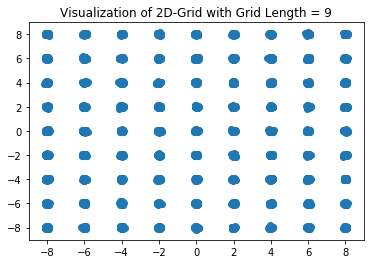

In [4]:
# here's what the 2D-Grid looks like
num_samples = 10000
grid_length = 9
samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.title("Visualization of 2D-Grid with Grid Length = %d" % grid_length)
plt.scatter(*zip(*samples))

[Epoch 0/10000] [Discriminator Loss: 0.739895] [Generator Loss: 0.712506]


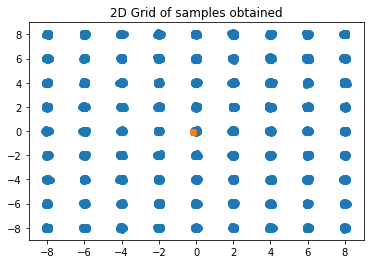

[Epoch 1000/10000] [Discriminator Loss: 0.250665] [Generator Loss: 1.823232]


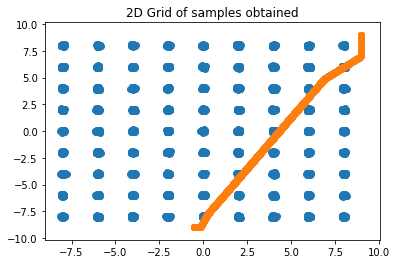

[Epoch 2000/10000] [Discriminator Loss: 0.453474] [Generator Loss: 1.202084]


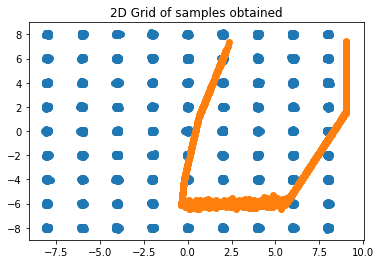

[Epoch 3000/10000] [Discriminator Loss: 0.471011] [Generator Loss: 1.253354]


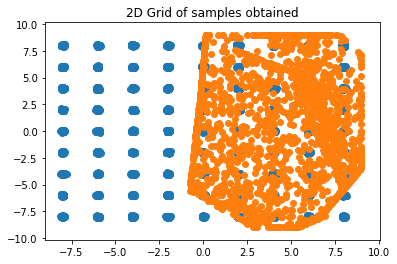

[Epoch 4000/10000] [Discriminator Loss: 0.504951] [Generator Loss: 1.053256]


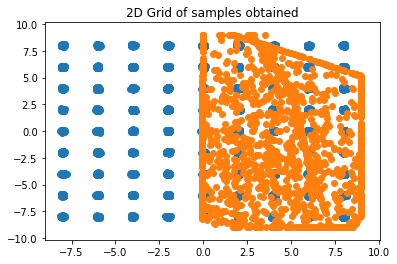

[Epoch 5000/10000] [Discriminator Loss: 0.525201] [Generator Loss: 1.101528]


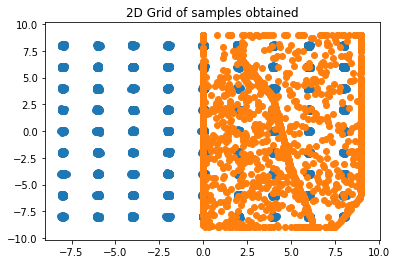

[Epoch 6000/10000] [Discriminator Loss: 0.482905] [Generator Loss: 1.074808]


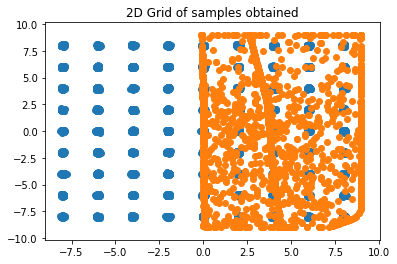

[Epoch 7000/10000] [Discriminator Loss: 0.484487] [Generator Loss: 1.051683]


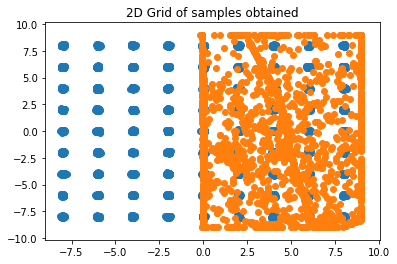

[Epoch 8000/10000] [Discriminator Loss: 0.475108] [Generator Loss: 1.078384]


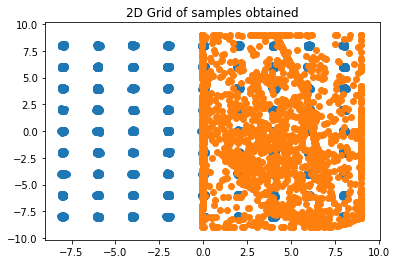

[Epoch 9000/10000] [Discriminator Loss: 0.474763] [Generator Loss: 0.925045]


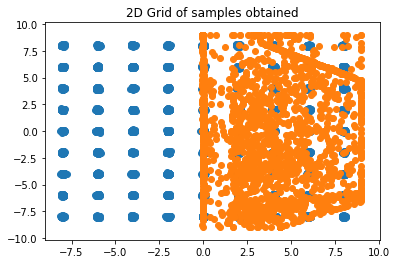

Grid length = 9


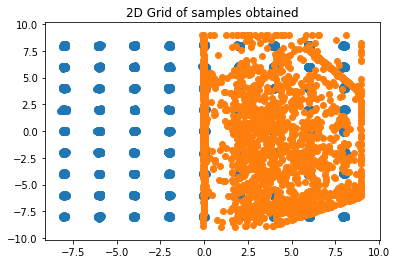

In [3]:
# run this cell only if you want to train a different GAN

# experiment parameters
num_samples = 10000 # for plotting
num_epochs = 10000
num_samples_per_batch = 500
grid_length = 9
var = 0.0025
latent_dim = 2
layer_width = 3

gen = gan.train(save_model=True, filename="ok_generator_81",
                num_samples=num_samples, num_epochs=num_epochs, 
                num_samples_per_batch=num_samples_per_batch, 
                grid_length=grid_length, var=var, latent_dim=latent_dim,
                layer_width=layer_width)

plt.clf()

# underlay of true distribution
real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

# look at some samples
num_samples_to_test = 2000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained")
plt.scatter(*(zip(*np_samples)))

print("Grid length = %d" % grid_length)

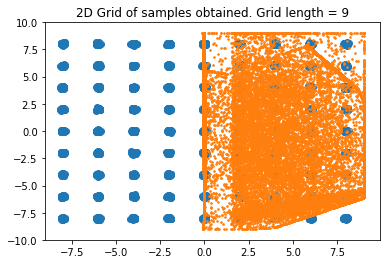

In [5]:
# load the model back and sample from it
latent_dim = 2
layer_width = 3
# loaded_gen = gan.load_model("good_generator_2018_07_11").eval()
# loaded_gen = gan.load_model("meh_generator_2018_07_11").eval()

loaded_gen = gan.load_model("ok_generator_81", grid_length=grid_length, layer_width=layer_width).eval()

plt.clf()

real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained. Grid length = %d" % grid_length)
plt.scatter(*zip(*np_samples), s=2.5)

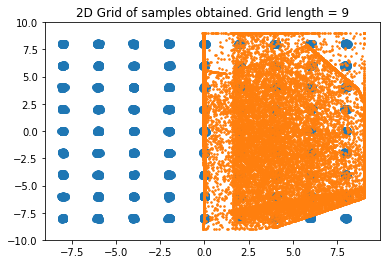

In [6]:
plt.clf()
gan.visualize_model(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

Cuda: True


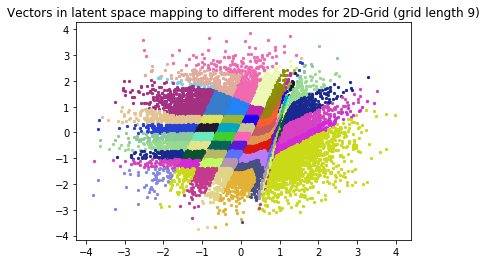

In [7]:
grid_length = 9
reload(gan)

gan.visualize_latent_space(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

In [ ]:
num_trials = 1000
r = gan.gradient_free_avg_radius(loaded_gen, latent_dim=latent_dim, grid_length=grid_length, num_trials=num_trials)

[Iteration 100] [Distance: 0.113066]
[Iteration 200] [Distance: 0.113506]
[Iteration 300] [Distance: 0.120467]
[Iteration 400] [Distance: 0.123914]
[Iteration 500] [Distance: 0.121152]
[Iteration 600] [Distance: 0.124045]
[Iteration 700] [Distance: 0.123119]
